<a href="https://colab.research.google.com/github/greyhound101/IEEE-CIS-Fraud/blob/master/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.1.0-rc0

  Using cached https://files.pythonhosted.org/packages/4d/fd/7528e5ef327abde9b7425aea24198d8b139795c1233d1658c1279055d860/tensorflow-2.1.0rc0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.1.0rc0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estima

In [2]:
pip install keras==2.3.1

In [3]:
!kaggle competitions download -c ieee-fraud-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "" # username from the json file
os.environ['KAGGLE_KEY'] = "" # key from the json file
!kaggle competitions download -c ieee-fraud-detection

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_identity.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_identity.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_transaction.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_transaction.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
pip install category_encoders

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [7]:
import pandas as pd
import numpy as np
#read autoencoded columns selected via time validation 
cols=['Hidden_7_22', 'Hidden_7_32', 'Hidden_7_96', 'Hidden_7_8',
       'Hidden_3_85', 'Hidden_7_9', 'Hidden_4_5', 'Hidden_3_52',
       'Hidden_3_64', 'Hidden_3_63', 'Hidden_7_11', 'Hidden_7_33',
       'Hidden_3_28', 'Hidden_7_69', 'Hidden_7_2', 'Hidden_7_92',
       'Hidden_7_23', 'Hidden_3_99', 'Hidden_7_28', 'Hidden_3_47',
       'Hidden_3_88', 'Hidden_7_0', 'Hidden_7_34', 'Hidden_3_76',
       'Hidden_7_31', 'Hidden_7_64', 'Hidden_7_72', 'Hidden_7_70',
       'Hidden_7_10', 'Hidden_3_3', 'Hidden_4_13', 'Hidden_7_68',
       'Hidden_7_50', 'Hidden_7_57', 'Hidden_7_67', 'Hidden_7_36',
       'Hidden_3_6', 'Hidden_7_12', 'Hidden_7_91', 'Hidden_7_39',
       'Hidden_6_1', 'Hidden_3_95', 'Hidden_3_40', 'Hidden_7_83',
       'Hidden_7_29', 'Hidden_6_19', 'Hidden_4_10', 'Hidden_6_5',
       'Hidden_3_70', 'Hidden_3_86', 'Hidden_3_48', 'Hidden_3_30',
       'Hidden_7_7', 'Hidden_7_78', 'Hidden_6_10', 'Hidden_7_54',
       'Hidden_3_13', 'Hidden_7_46', 'Hidden_7_21', 'Hidden_6_3',
       'Hidden_7_73', 'Hidden_6_16', 'Hidden_3_9', 'Hidden_6_22',
       'Hidden_7_48', 'Hidden_7_66', 'Hidden_7_45', 'Hidden_6_8',
       'Hidden_7_84', 'Hidden_3_5', 'Hidden_7_18', 'Hidden_4_6',
       'Hidden_7_38', 'Hidden_6_6', 'Hidden_3_32', 'Hidden_3_83',
       'Hidden_7_14', 'Hidden_7_27', 'Hidden_5_0', 'Hidden_3_50',
       'Hidden_4_3', 'Hidden_7_65', 'Hidden_3_35', 'Hidden_7_56',
       'Hidden_3_33', 'Hidden_4_21', 'Hidden_3_77', 'Hidden_4_17',
       'Hidden_3_68', 'Hidden_3_82', 'Hidden_3_4', 'Hidden_3_75',
       'Hidden_3_20', 'Hidden_3_27', 'Hidden_3_66', 'Hidden_3_37',
       'Hidden_3_71', 'Hidden_3_89', 'Hidden_3_53', 'Hidden_3_46']
path = F"/content/gdrive/My Drive/autoenc.csv" 

selected=pd.read_csv(path,usecols=cols)

#read raw data after preparation
path = F"/content/gdrive/My Drive/raw1.csv" 

dumm=pd.read_csv(path)
selected=selected.astype('float16')
import gc
gc.collect()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,50,51,53,58,59,62,63,64,65,66,69,72,73,76,77,78,79,80,81,82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0

In [8]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            df[col]=df[col].fillna(-1)
            df[col]=df[col].replace([np.inf,-np.inf],-1)
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#reduce memory useage of raw data

dumm=reduce_mem_usage(dumm)

#concat raw and autoencoded data

for_lgb=pd.concat([dumm,selected],1)

#split total dataset in train and test

for_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in for_lgb.columns]
fnl_trn=for_lgb.loc[for_lgb['isFraud']>=0]
fnl_tst=for_lgb.loc[for_lgb['isFraud']==-1]
fnl_tst=fnl_tst.reset_index(drop=True)
import gc
del([for_lgb])
gc.collect()

Memory usage of dataframe is 5307.35 MB
Memory usage after optimization is: 955.38 MB
Decreased by 82.0%


0

In [0]:
keeps=['ProductCD','card1','card2','card3','card4','card5','card6','P_emaildomain','R_emaildomain']
trn_trans=pd.read_csv('train_transaction.csv.zip',usecols=keeps)
tst_trans=pd.read_csv('test_transaction.csv.zip',usecols=keeps)
trans=pd.concat([trn_trans,tst_trans],0)
trans=trans.reset_index(drop=True)
del([trn_trans,tst_trans])
gc.collect()
dumm=dumm.filter(regex='dum')
fnl=pd.concat([dumm,selected,trans],1)
del([trans,dumm,selected])
gc.collect()
keeps_fnl=fnl[keeps]
fnl=fnl.drop(keeps,1)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mms=MinMaxScaler()
ls=list(fnl)
fnl=pd.DataFrame(mms.fit_transform(ss.fit_transform(fnl)))
fnl.columns=ls
fnl=pd.concat([fnl,keeps_fnl],1)
from sklearn.preprocessing import LabelEncoder
for col in keeps:
    le=LabelEncoder()
    fnl[col]=le.fit_transform(fnl[col].astype(str))



In [10]:
z=pd.read_csv('train_transaction.csv.zip',usecols=['isFraud'])
fnl['isFraud']=z['isFraud']
fnl['isFraud'].isna().sum()

506691

In [0]:
trn=fnl.loc[fnl['isFraud'].dropna().index].reset_index(drop=True)
tst=fnl.loc[fnl['isFraud'].isna()].reset_index(drop=True)
import keras.backend as K
from keras.layers import Input,Dense,BatchNormalization,Dropout,Embedding,Concatenate,Flatten
from keras.models import Model
from keras.layers import Embedding,Dot,Add,Flatten,concatenate,BatchNormalization,Input,Dense
import tensorflow as tf
from itertools import combinations
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import KFold
from keras.optimizers import Nadam
from sklearn.metrics import roc_auc_score
from keras.regularizers import l2,l1
import keras
from sklearn.metrics import roc_auc_score
def model1(shape,er,ar,r1,r2,r3,r4):
    K.clear_session()
    inps=[]
    embs=[]
    for col in keeps:
        inp=Input((1,))
        emb=Embedding(fnl[col].max()+1,5,trainable=True,embeddings_regularizer=l1(er),activity_regularizer=l1(ar))(inp)
        inps.append(inp)
        embs.append(emb)
    x=concatenate(embs)
    x=Dense(256,activation='relu',kernel_regularizer=l1(r1))(x)
    x=BatchNormalization()(x)
    one=[Flatten()(em) for em in embs]
    second=[]
    for a,b in combinations(embs,2):
        second.append(Dot(1)([Flatten()(a),Flatten()(b)]))
    one=Add()(one)
    second=Add()(second)
    x=Flatten()(x)
    inp=Input((inp_shape,))
    inps.append(inp)
    tot=[x,(one),(second),(inp)]
    x=concatenate(tot)
    x=BatchNormalization()(x)
    x=Dense(256,activation='relu',kernel_regularizer=l1(r2))(x)
    x=BatchNormalization()(x)
    x=Dropout(0.3)(x)
    x=Dense(256,activation='relu',kernel_regularizer=l1(r3))(x)
    x=BatchNormalization()(x)
    x=Dropout(0.3)(x)
    x=Dense(256,activation='relu',kernel_regularizer=l1(r4))(x)
    x=BatchNormalization()(x)
    x=Dropout(0.3)(x)
    out=Dense(1,activation='sigmoid')(x)
    mod=Model(inputs=inps,outputs=out)
    return mod
def fl(gamma1,alpha1):
    def focal_loss(y_true, y_pred):
        gamma=gamma1
        alpha=alpha1
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

        pt_1 = K.clip(pt_1, 1e-3, .999)
        pt_0 = K.clip(pt_0, 1e-3, .999)

        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss
def auc(y_true, y_pred):
    auc = tf.keras.metrics.AUC(y_true, y_pred)
    return auc
inp_shape=trn.shape[1]-len(keeps)
inp_shape=inp_shape-1
pre=pd.DataFrame()
    
fit=500000
batch_size=2048
validation=trn.loc[fit:]
z_val=validation[keeps].values
z_tst=tst[keeps].values
del([trn])
gc.collect()
kp1=['ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'P_emaildomain',
 'R_emaildomain','isFraud']


In [13]:
trn.shape

(590540,)

In [0]:

#neural net model

mod=model1(validation.shape[1]-1,0.0360,0.3046,0.01,0.01,0.01,0.01)
es=EarlyStopping(monitor='val_loss',patience=100,mode='min',min_delta=0.001,restore_best_weights=True)
dc=ReduceLROnPlateau(monitor='val_loss', factor=0.8,mode='min',patience=10,min_delta=0.01)
mod.compile(optimizer=Nadam(0.0008),loss=fl(alpha1=0.75,gamma1=2.43),metrics=[tf.keras.metrics.AUC()])
path = F"/content/gdrive/My Drive/focal.hdf5" 
mod.load_weights(path)

#predict using neural net

pre_nn=mod.predict([z_tst[:,0],z_tst[:,1],z_tst[:,2],z_tst[:,3],z_tst[:,4],z_tst[:,5],z_tst[:,6],z_tst[:,7],z_tst[:,8],tst.drop(kp1,1).values])
pre_nn=pre_nn.reshape(1,-1)[0]
del([fnl])
gc.collect()
fit=fnl_trn
vald=fnl_tst
import lightgbm as lgb

#predict using lgbm

mod=lgb.LGBMClassifier()
mod.fit(fit.drop(['isFraud'],1),fit['isFraud'])
pre=mod.predict_proba(vald.drop(['isFraud'],1))

In [0]:

#combine neural net and lgbm predictions

pre=pre[:,1]
a=(pre*0.91)+(pre_nn*0.09)
ss=pd.read_csv('sample_submission.csv.zip')
ss=ss.set_index('TransactionID')
ss['isFraud']=a
ss.to_csv('sub.csv')

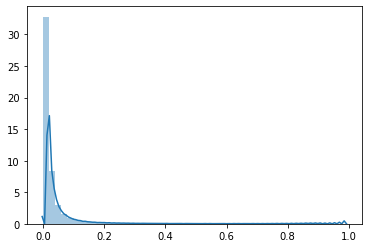

In [19]:
import seaborn as sns
sns.distplot(a)